# 在线项目实习


## 任务一、数据预处理与分析


In [2]:
#import
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import wordcloud
from sklearn.preprocessing import MinMaxScaler
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

### 任务1.1
根据附件1中的数据，提取每台售货机对应的销售数据，保存在csv文件中，文件名分别为“task1-1A.csv”、"task1-1B.csv"........

In [3]:
order_info = pd.read_csv("附件1.csv",encoding='gbk')
print(order_info.columns)
print(order_info.shape)
order_info.drop(columns='设备ID',inplace=True)
order_info['支付时间'] = pd.to_datetime(order_info['支付时间'],errors='coerce')


Index(['订单号', '设备ID', '应付金额', '实际金额', '商品', '支付时间', '地点', '状态', '提现'], dtype='object')
(70680, 9)


In [4]:
machine_A = order_info[order_info['地点']=='A']
machine_B = order_info[order_info['地点']=='B']
machine_C = order_info[order_info['地点']=='C']
machine_D = order_info[order_info['地点']=='D']
machine_E = order_info[order_info['地点']=='E']
machine_A.to_csv('task1-1A.csv',encoding='gbk')
machine_B.to_csv('task1-1B.csv',encoding='gbk')
machine_C.to_csv('task1-1C.csv',encoding='gbk')
machine_D.to_csv('task1-1D.csv',encoding='gbk')
machine_E.to_csv('task1-1E.csv',encoding='gbk')


### 任务1.2

计算每台售货机2017年5月份的交易额、订单量及所有售货机交易总额和订单总量，以表格形式体现在报告中



In [5]:
def task1_2(data):
    data['月'] = data['支付时间'].dt.month
    month_5 = data[data['月']==5]
    a = month_5['实际金额'].sum()
    b = month_5['订单号'].count()
    c = pd.DataFrame([a,b],index=['交易额','订单量'])
    print(c)
    return c

task1_2(machine_A).to_csv('task1-2A.csv',encoding='gbk')
task1_2(machine_B).to_csv('task1-2B.csv',encoding='gbk')
task1_2(machine_C).to_csv('task1-2C.csv',encoding='gbk')
task1_2(machine_D).to_csv('task1-2D.csv',encoding='gbk')
task1_2(machine_E).to_csv('task1-2E.csv',encoding='gbk')
task1_2(order_info).to_csv('task1-2SUM.csv',encoding='gbk')




          0
交易额  3385.1
订单量   756.0
          0
交易额  3681.2
订单量   869.0
          0
交易额  3729.4
订单量   789.0
          0
交易额  2392.1
订单量   564.0
          0
交易额  5699.0
订单量  1292.0
           0
交易额  18886.8
订单量   4270.0


C:\Users\DELL\AppData\Local\Temp\ipykernel_16584\1616622220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['月'] = data['支付时间'].dt.month
C:\Users\DELL\AppData\Local\Temp\ipykernel_16584\1616622220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['月'] = data['支付时间'].dt.month
C:\Users\DELL\AppData\Local\Temp\ipykernel_16584\1616622220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

### 任务1.3

计算每台售货机每月的每单平均交易额与日均订单量，以表格形式体现在报告中

In [6]:
def task1_3(data):
    data['月'] = [i.month for i in data['支付时间']]
    days_number = [31,28,31,30,31,30,31,31,30,31,30,31]
    a=0
    data_mo=[]
    data_co=[]
    data_month=[]
    while a <12:
        a+=1
        data_t = data[data['月'] == a]
        data_money = data_t['实际金额'].sum()
        data_count = data_t['订单号'].count()
        money_order = data_money/data_count
        count_order = data_count/days_number[a-1]
        data_mo.append(money_order)
        data_co.append(count_order)
        data_month.append(a)
        task1_3=pd.DataFrame({'月':data_month,'每月的每单平均交易额':data_mo,'日均订单量':data_co})
        if a == 12:
            return task1_3

task1_3(machine_A).to_csv('task1-3A.csv',encoding = 'gbk')
task1_3(machine_B).to_csv('task1-3B.csv',encoding = 'gbk')
task1_3(machine_C).to_csv('task1-3C.csv',encoding = 'gbk')
task1_3(machine_D).to_csv('task1-3D.csv',encoding = 'gbk')
task1_3(machine_E).to_csv('task1-3E.csv',encoding = 'gbk')

C:\Users\DELL\AppData\Local\Temp\ipykernel_16584\1862794890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['月'] = [i.month for i in data['支付时间']]


## 任务二、数据分析与可视化


In [7]:
def task2_2_1(data):
    data['月'] = [i.month for i in data['支付时间']]
    days_number = [31,28,31,30,31,30,31,31,30,31,30,31]
    i=0
    data_month=[]
    data_sum = []
    while i <12:
        i+=1
        data_t = data[data['月'] == i]
        data_money = data_t['实际金额'].sum()
        data_sum.append(data_money)
        data_month.append(i)
        task1_3=pd.DataFrame({'月':data_month,'每月总交易额':data_sum})
        if i == 12:
            return task1_3

gmv_a = task2_2_1(machine_A)
gmv_b = task2_2_1(machine_B)
gmv_c = task2_2_1(machine_C)
gmv_d = task2_2_1(machine_D)
gmv_e = task2_2_1(machine_E)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16584\2580727690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['月'] = [i.month for i in data['支付时间']]


### 任务2.1

绘制2017年6月销量前5的商品销量柱状图

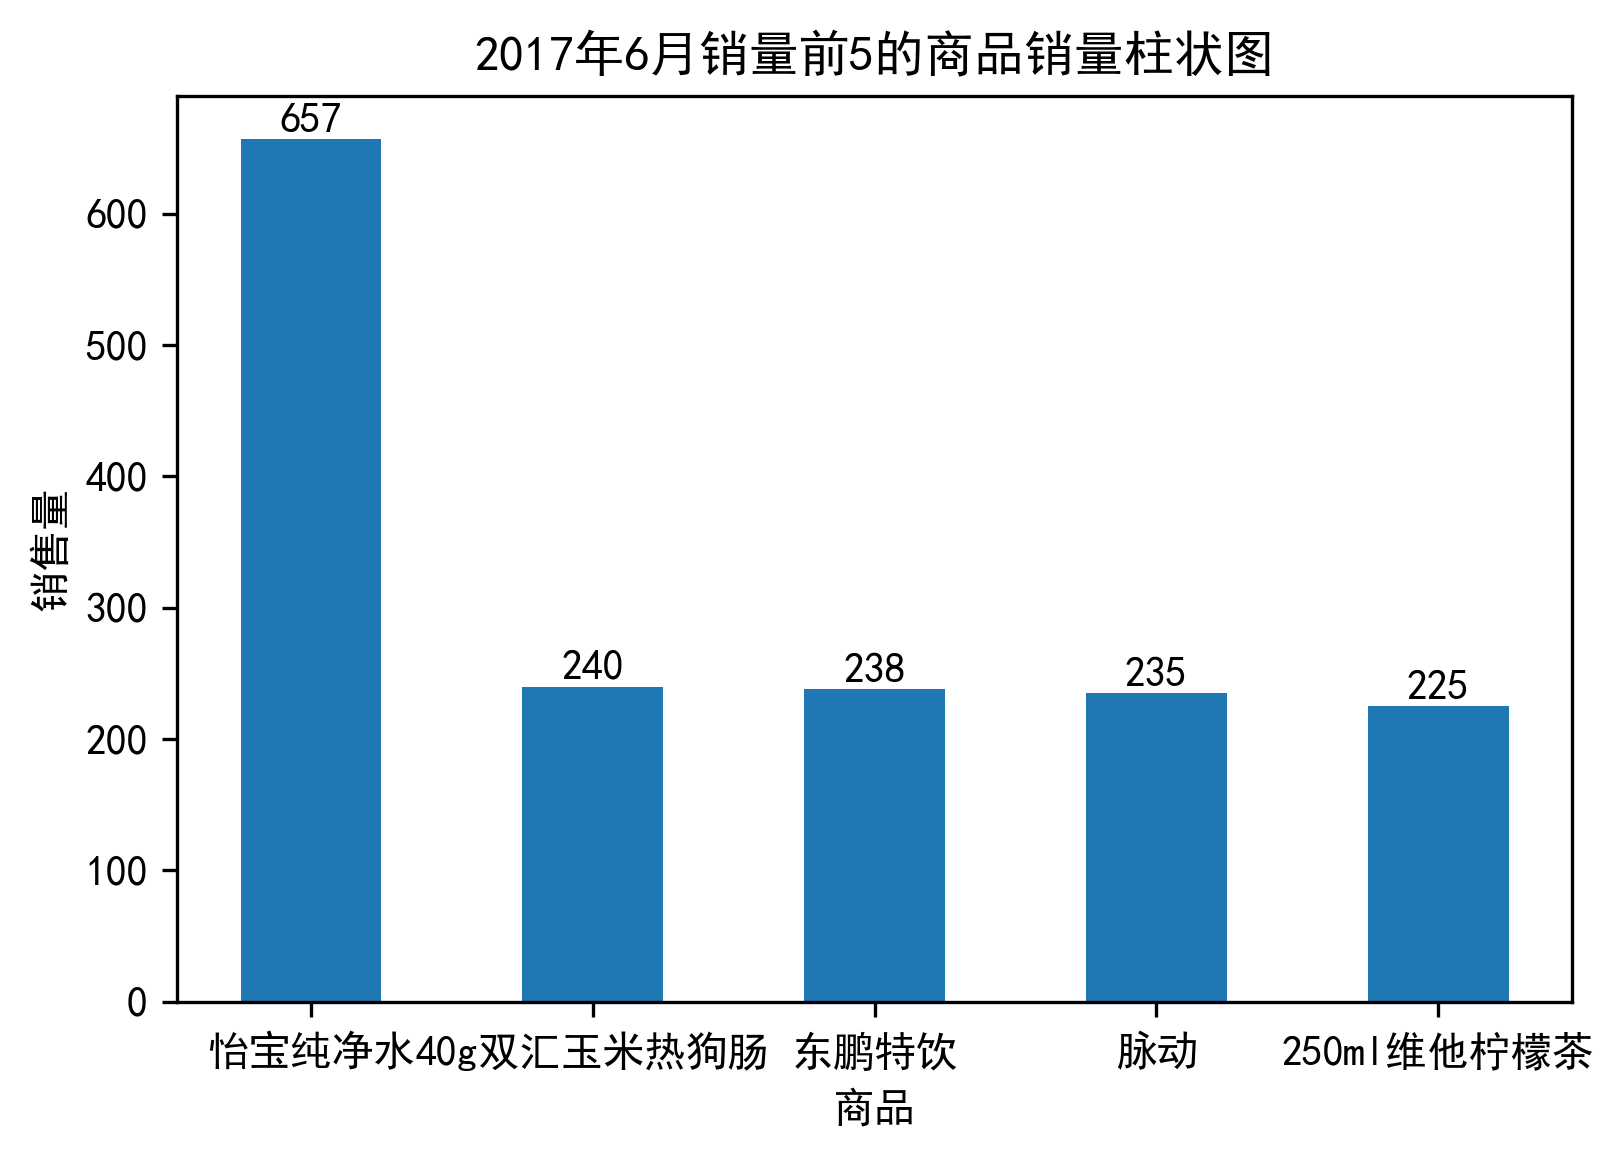

In [8]:
order_info['月'] = order_info['支付时间'].dt.month
month_6 = order_info[order_info['月'] == 6]
goods = order_info['商品'].drop_duplicates().tolist()
amont = []
count = []
for i in goods:
    amonts = month_6[month_6['商品'] == i]['实际金额'].sum()
    counts = month_6[month_6['商品'] == i]['商品'].count()
    amont.append(amonts)
    count.append(counts)
task2_1 = pd.DataFrame({'商品':goods,'销售额':amont,'销售量':count})
top_5 = task2_1.sort_values(by = '销售量',ascending=False).head()
#画图
pic2_1 = plt.figure(dpi=300)
plt.rcParams['font.sans-serif'] = 'SimHei'  #设置中文显示
plt.rcParams['axes.unicode_minus'] = False
name = top_5['商品']
vals = top_5['销售量']
plt.bar(name,vals,width=0.5)
plt.xlabel('商品')
plt.ylabel('销售量')
plt.title('2017年6月销量前5的商品销量柱状图')
plt.xticks(range(5), labels=top_5['商品'])
for x,y in enumerate(top_5['销售量']):
    plt.text(x,y+5,'%s'%round(y),ha='center')
plt.show()
pic2_1.savefig('2017年6月销量前5的商品销量柱状图')


### 任务2.2

绘制每台售货机每月总交易额折线图及交易额月环比增长率柱状图（（本期数-上期数）/上期数×100%）


In [9]:
def task2_2_1(data):
    data['月'] = [i.month for i in data['支付时间']]
    days_number = [31,28,31,30,31,30,31,31,30,31,30,31]
    i=0
    data_month=[]
    data_sum = []
    while i <12:
        i+=1
        data_t = data[data['月'] == i]
        data_money = data_t['实际金额'].sum()
        data_sum.append(data_money)
        data_month.append(i)
        task1_3=pd.DataFrame({'月':data_month,'每月总交易额':data_sum})
        if i == 12:
            return task1_3

gmv_a = task2_2_1(machine_A)
gmv_b = task2_2_1(machine_B)
gmv_c = task2_2_1(machine_C)
gmv_d = task2_2_1(machine_D)
gmv_e = task2_2_1(machine_E)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16584\2580727690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['月'] = [i.month for i in data['支付时间']]


#### 折线图

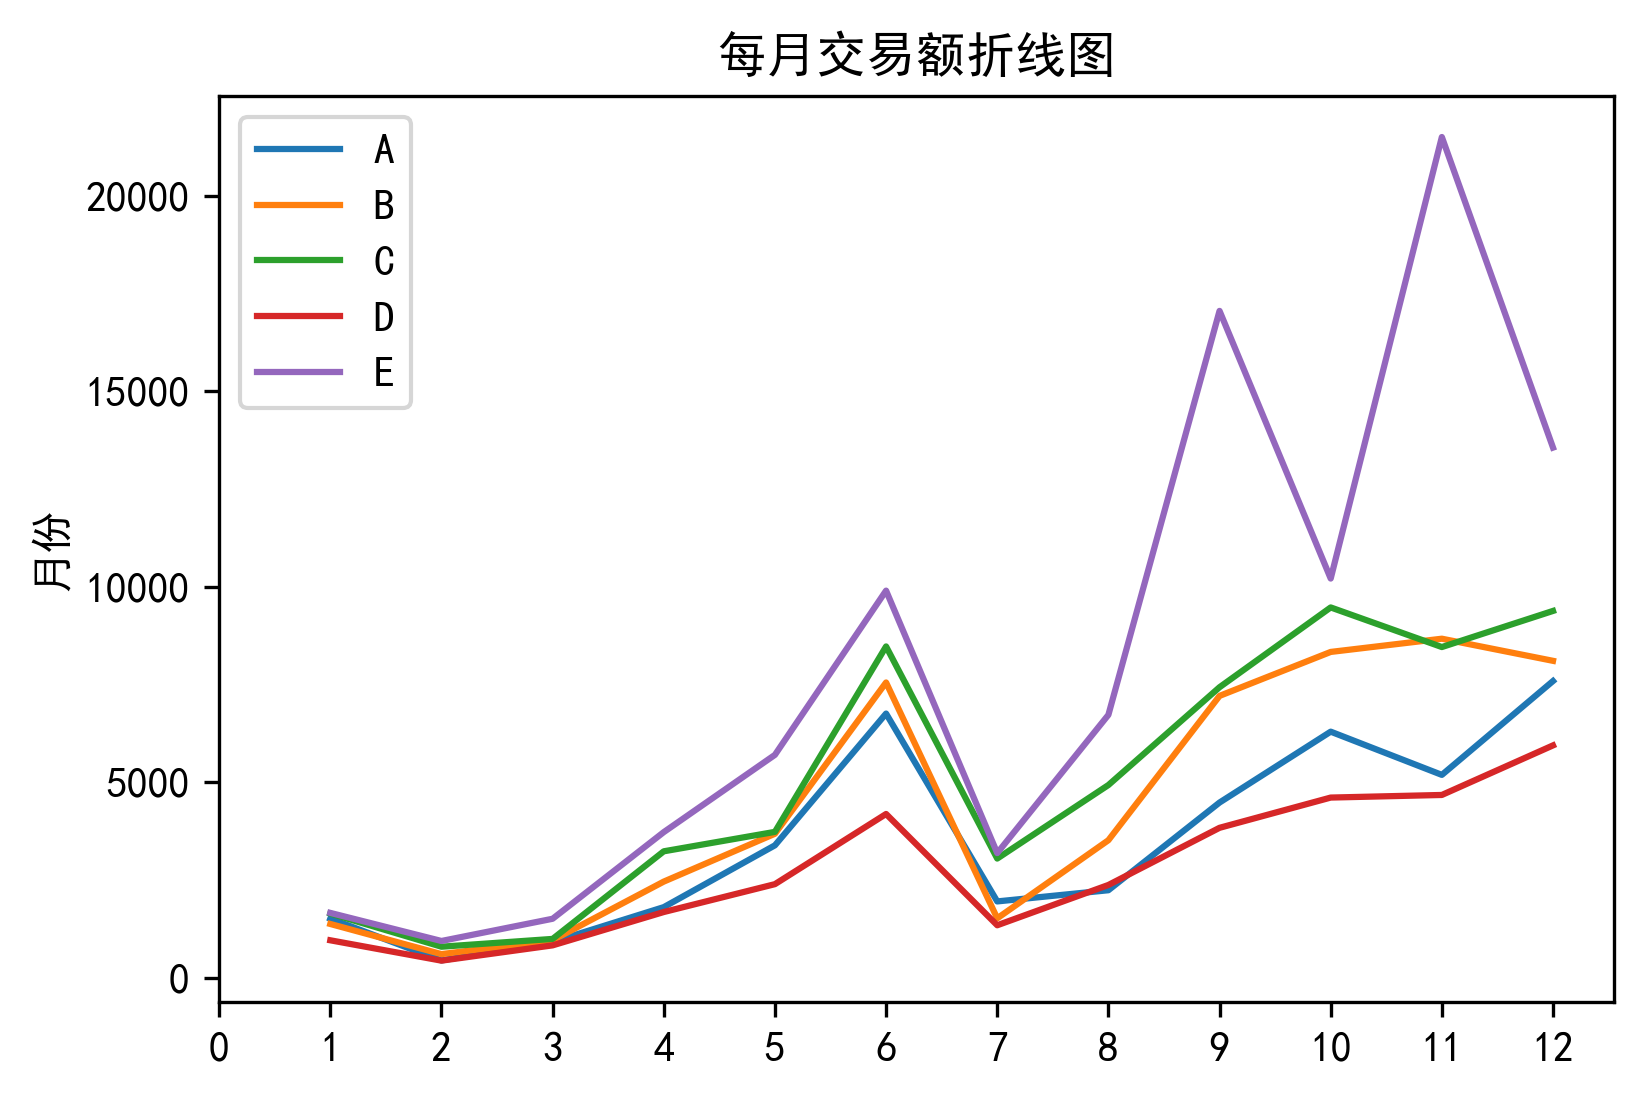

In [10]:
pic2 = plt.figure(dpi=300)
plt.plot(gmv_a['月'],gmv_a['每月总交易额'],label = 'A')
plt.plot(gmv_b['月'],gmv_b['每月总交易额'],label = 'B')
plt.plot(gmv_c['月'],gmv_c['每月总交易额'],label = 'C')
plt.plot(gmv_d['月'],gmv_d['每月总交易额'],label = 'D')
plt.plot(gmv_e['月'],gmv_e['每月总交易额'],label = 'E')
plt.ylabel('交易额')
plt.ylabel('月份')
plt.title('每月交易额折线图')
plt.legend()
plt.xticks(range(13))
pic2.savefig('每月交易额折线图')

In [11]:
qoqg =[]
for i in range(1,12):
    qoq=(gmv_a['每月总交易额'][i]-gmv_a['每月总交易额'][i-1])/gmv_a['每月总交易额'][i-1]#计算月环比增长率
    qoqg.append(qoq)
qoqg

[-0.7082201761939457,
 1.0755959137343927,
 0.9736410368587992,
 0.8759213078415073,
 0.995539275058344,
 -0.7112551997749849,
 0.14683414509100234,
 1.0025481693414993,
 0.4047103471369572,
 -0.17567223952704847,
 0.4627144785039521]

#### 交易额月环比增长比例图

In [12]:
def task2_2_2(data):
    i=0
    qoqg=[]
    data_gmv = data['每月总交易额']
    for i in range(1,12):
        qoq=(data_gmv[i]-data_gmv[i-1])/data_gmv[i-1]#计算月环比增长率
        qoqg.append(qoq)
    result = pd.DataFrame({'月':range(2,13),'月环比增长率':qoqg})   
    return result

qoqA = task2_2_2(gmv_a)
qoqB = task2_2_2(gmv_b)
qoqC = task2_2_2(gmv_c)
qoqD = task2_2_2(gmv_d)
qoqE = task2_2_2(gmv_e) 

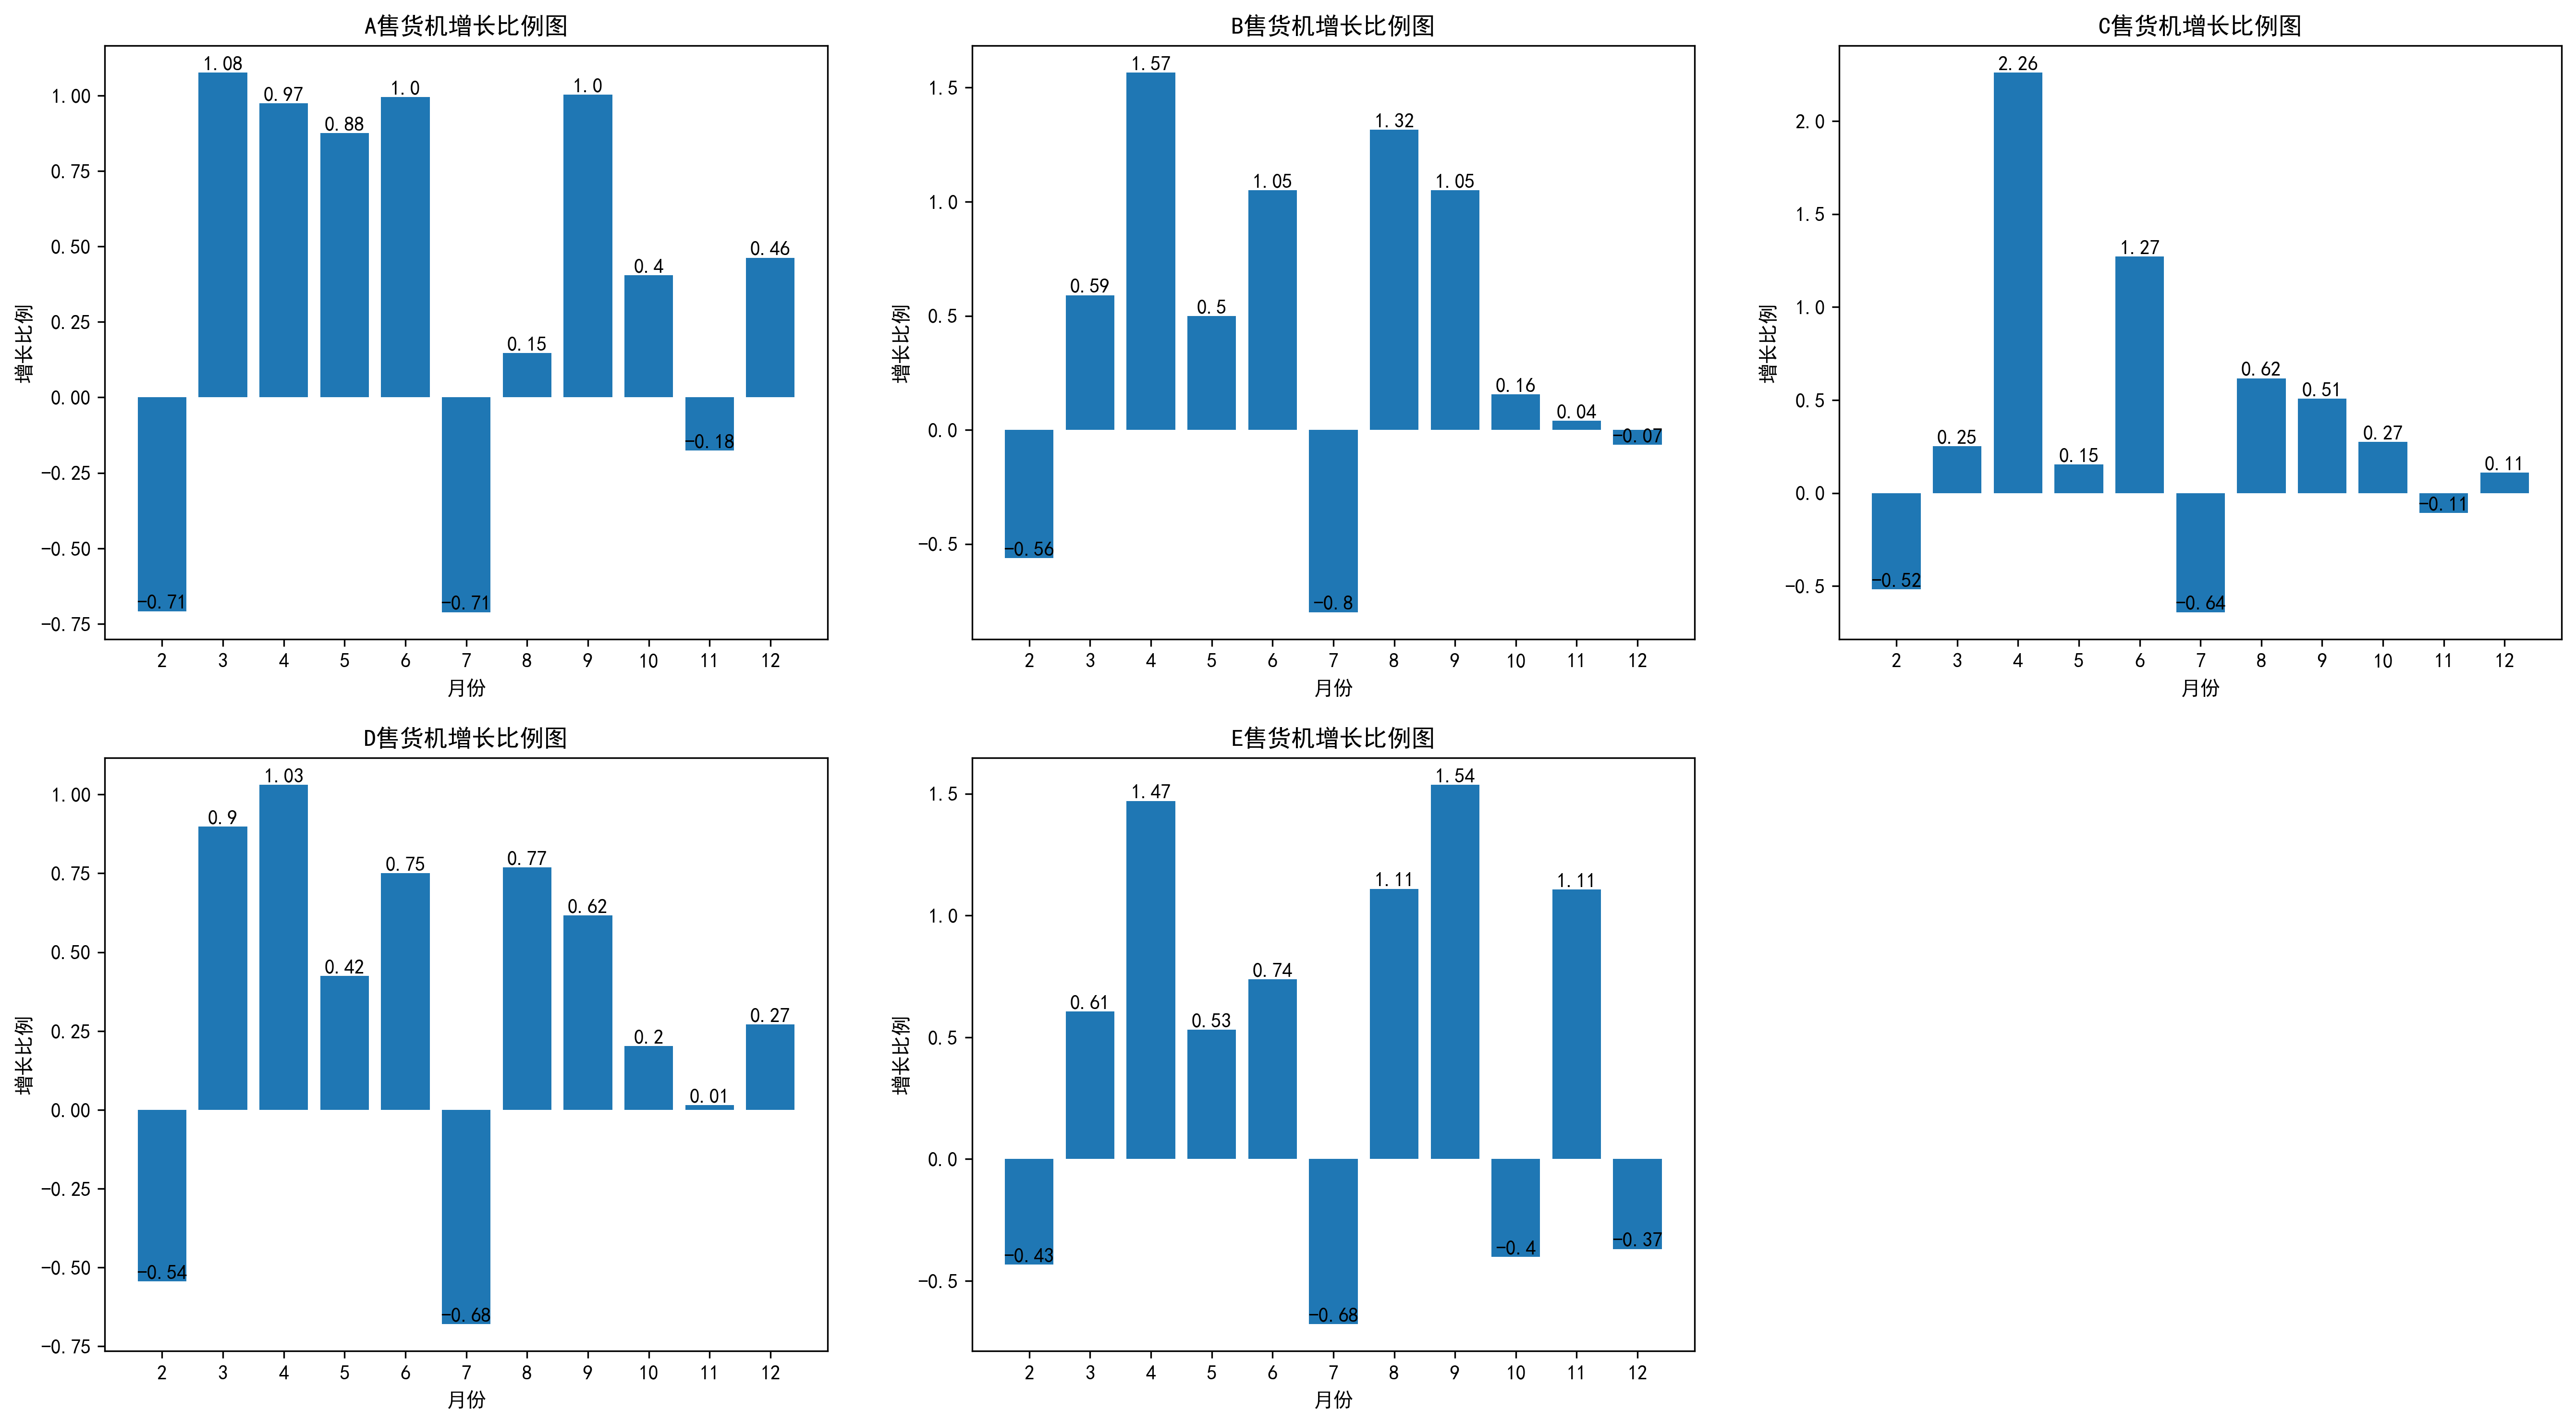

In [13]:
pic3 = plt.figure(dpi=300,figsize=(22,12))
plt.rcParams['axes.unicode_minus']=False
for i in range(1,6):
    name_list = ['A售货机增长比例图','B售货机增长比例图','C售货机增长比例图','D售货机增长比例图','E售货机增长比例图']
    data_list = (qoqA,qoqB,qoqC,qoqD,qoqE)
    pic3.add_subplot(2,3,i)
    plt.bar(data_list[i-1]['月'],data_list[i-1]['月环比增长率'])
    plt.xticks(range(2,13))
    plt.xlabel('月份')
    plt.ylabel('增长比例')
    plt.title(name_list[i-1])
    for j in range(2,13):
        plt.text(j,data_list[i-1]['月环比增长率'][j-2],round(data_list[i-1]['月环比增长率'][j-2],2),va = 'bottom', ha = 'center')
    pic3.savefig('交易额月环比增长比例图')


### 任务2.3

绘制每台售货机毛利润占总毛利润比例的饼图（假设饮料类毛利率为25%，非饮料类为20%）

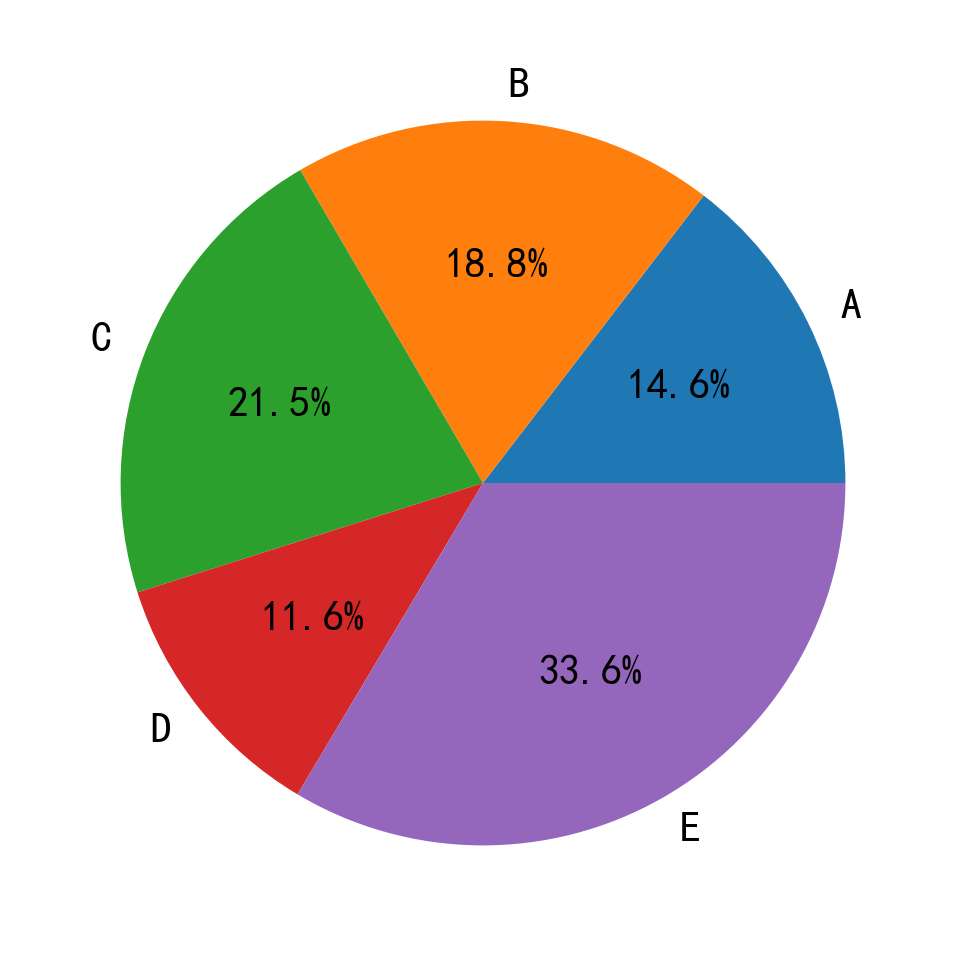

In [14]:
goods_info = pd.read_csv('附件2.csv',encoding='gbk')
compo_info = pd.merge(order_info,goods_info)
compo_info.to_csv('compo_info.csv',encoding='gbk')
drinks = compo_info[compo_info['大类'] == '饮料']
notdrinks = compo_info[compo_info['大类'] == '非饮料']
machine_list0 = ['A','B','C','D','E']
machine_list = ['compoA','compoB','compoC','compoD','compoE']
drinks_list = ['drinksA','drinksB','drinksC','drinksD','drinksE']
notdrinks_list = ['notdrinksA','notdrinksB','notdrinksC','notdrinksD','notdrinksE']
for i in range(5):
    machine_list[i] = compo_info[compo_info['地点'] == machine_list0[i]]
compoA = machine_list[0]
compoB = machine_list[1]
compoC = machine_list[2]
compoD = machine_list[3]
compoE = machine_list[4]
drinksA = compoA[compoA['大类'] == '饮料']
drinksB = compoB[compoB['大类'] == '饮料']
drinksC = compoC[compoC['大类'] == '饮料']
drinksD = compoD[compoD['大类'] == '饮料']
drinksE = compoE[compoE['大类'] == '饮料']
notdrinksA = compoA[compoA['大类'] == '非饮料']
notdrinksB = compoB[compoB['大类'] == '非饮料']
notdrinksC = compoC[compoC['大类'] == '非饮料']
notdrinksD = compoD[compoD['大类'] == '非饮料']
notdrinksE = compoE[compoE['大类'] == '非饮料']
def task2_3_1(dnk,ndnk):
    dnk_money = (dnk['实际金额'].sum())*0.25
    ndnk_money = (ndnk['实际金额'].sum())*0.2
    return dnk_money+ndnk_money
def task2_3_2(a,b,c,d,e):
    pic4 = plt.figure(dpi=300)
    a1 = a/(a+b+c+d+e)
    b1 = b/(a+b+c+d+e)
    c1 = c/(a+b+c+d+e)
    d1 = d/(a+b+c+d+e)
    e1 = e/(a+b+c+d+e)
    data = (a1,b1,c1,d1,e1)
    plt.pie(data,labels=['A','B','C','D','E'],autopct='%.1f%%')
    pic4.savefig('每台售货机毛利润占总毛利润比例饼状图')
prfA = task2_3_1(drinksA,notdrinksA)
prfB = task2_3_1(drinksB,notdrinksB)
prfC = task2_3_1(drinksC,notdrinksC)
prfD = task2_3_1(drinksD,notdrinksD)
prfE = task2_3_1(drinksE,notdrinksE)
task2_3_2(prfA,prfB,prfC,prfD,prfE)



### 任务2.4

绘制每月交易额均值气泡图，横轴为时间，纵轴为商品的二级类数目

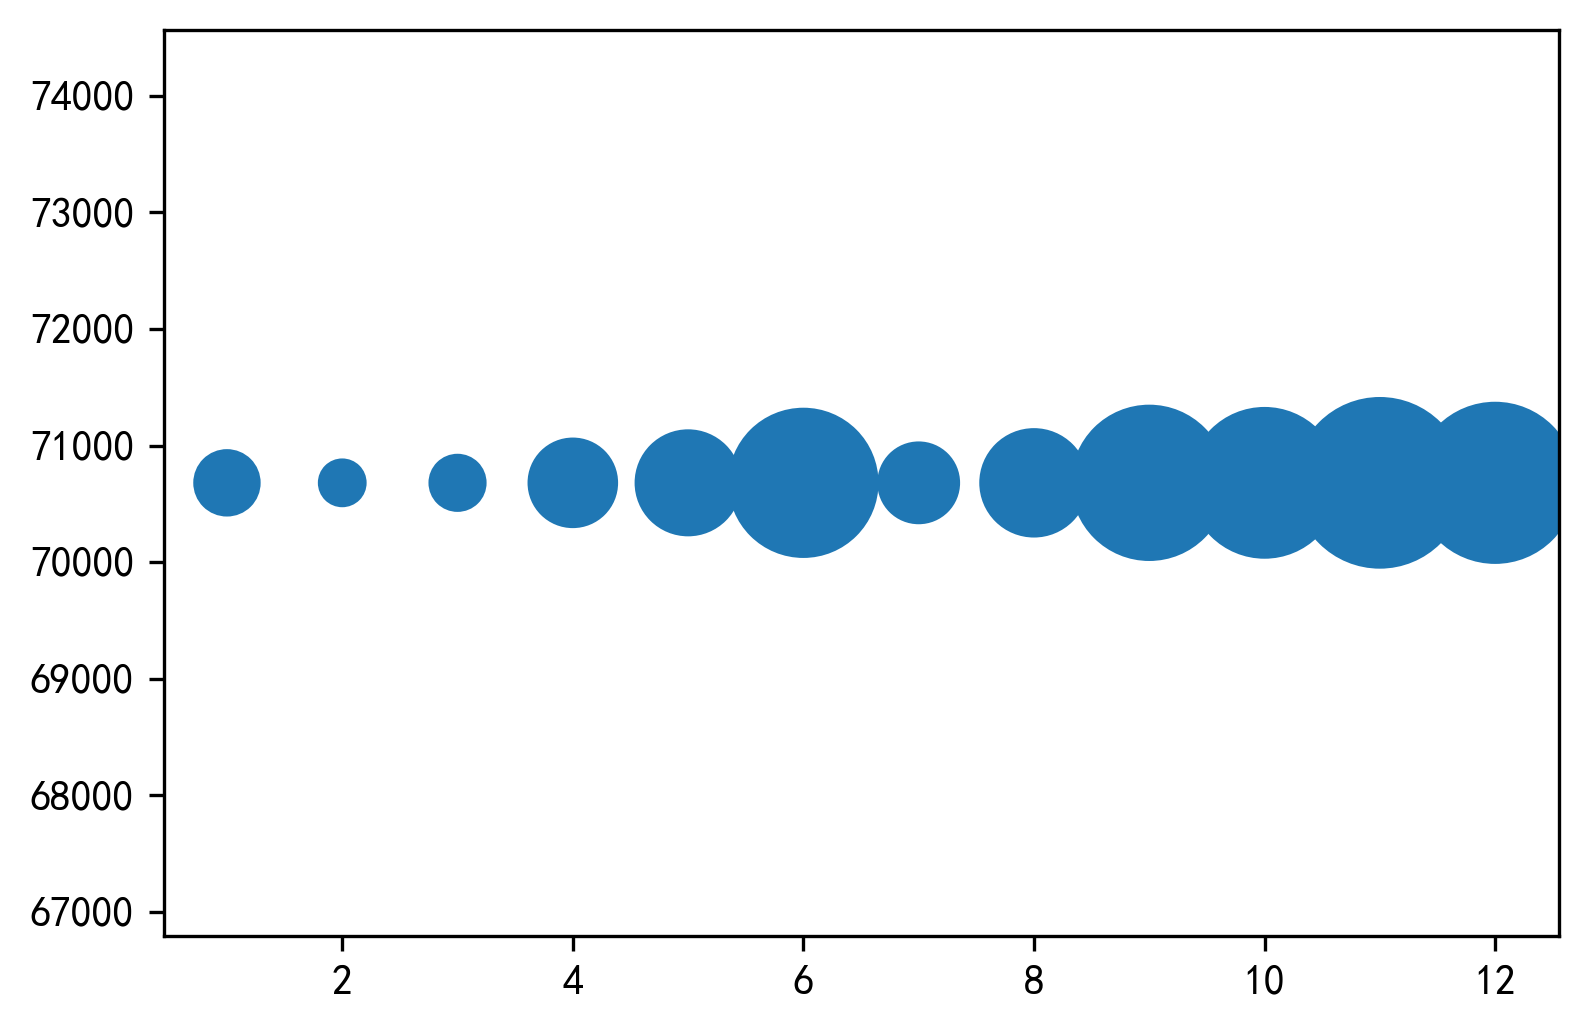

In [28]:
compo_info['月'] = compo_info['支付时间'].dt.month
def task2_4(data):
    days_number = [31,28,31,30,31,30,31,31,30,31,30,31]
    i = 0
    avggmv = []
    number = data['二级类'].size
    while i < 12:
        i += 1
        data_t = data[data['月'] == i]
        data_money = data_t['实际金额'].sum()
        avg_gmv = data_money/days_number[i-1]
        avggmv.append(avg_gmv)
    
    result = pd.DataFrame({'月':range(1,13),'每月交易额均值':avggmv,'二级类数目':number})
    return result

bubble_info = task2_4(compo_info)
pic5 = plt.figure(dpi=300)
plt.scatter(x=bubble_info['月'],y=bubble_info['二级类数目'],s=bubble_info['每月交易额均值'])
pic5.savefig('每月交易额均值气泡图')

        


### 任务2.5

绘制售货机C 6、7、8三个月订单量的热力图，横轴以天为单位，纵轴以小时为单位。从热力图可以分析得出哪些结论

C:\Users\DELL\AppData\Local\Temp\ipykernel_16584\687072720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compoC['天'] = compoC['支付时间'].dt.day
C:\Users\DELL\AppData\Local\Temp\ipykernel_16584\687072720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compoC['小时'] = compoC['支付时间'].dt.hour


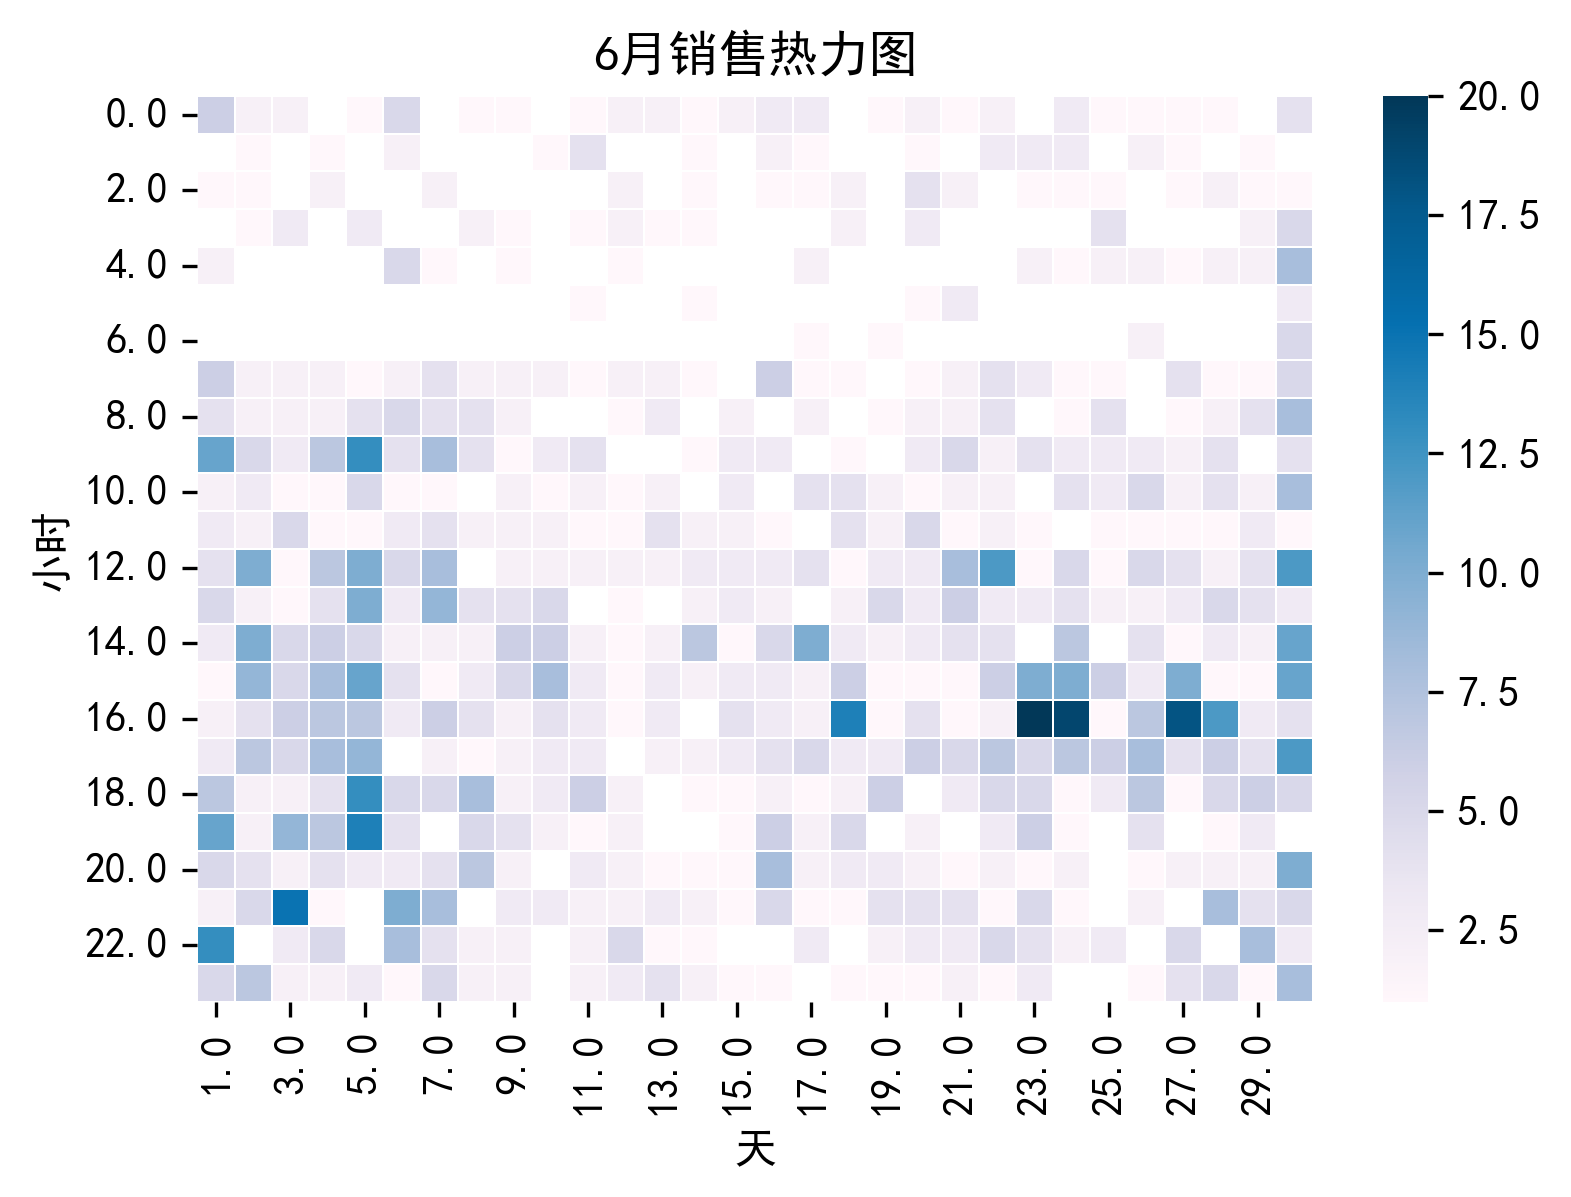

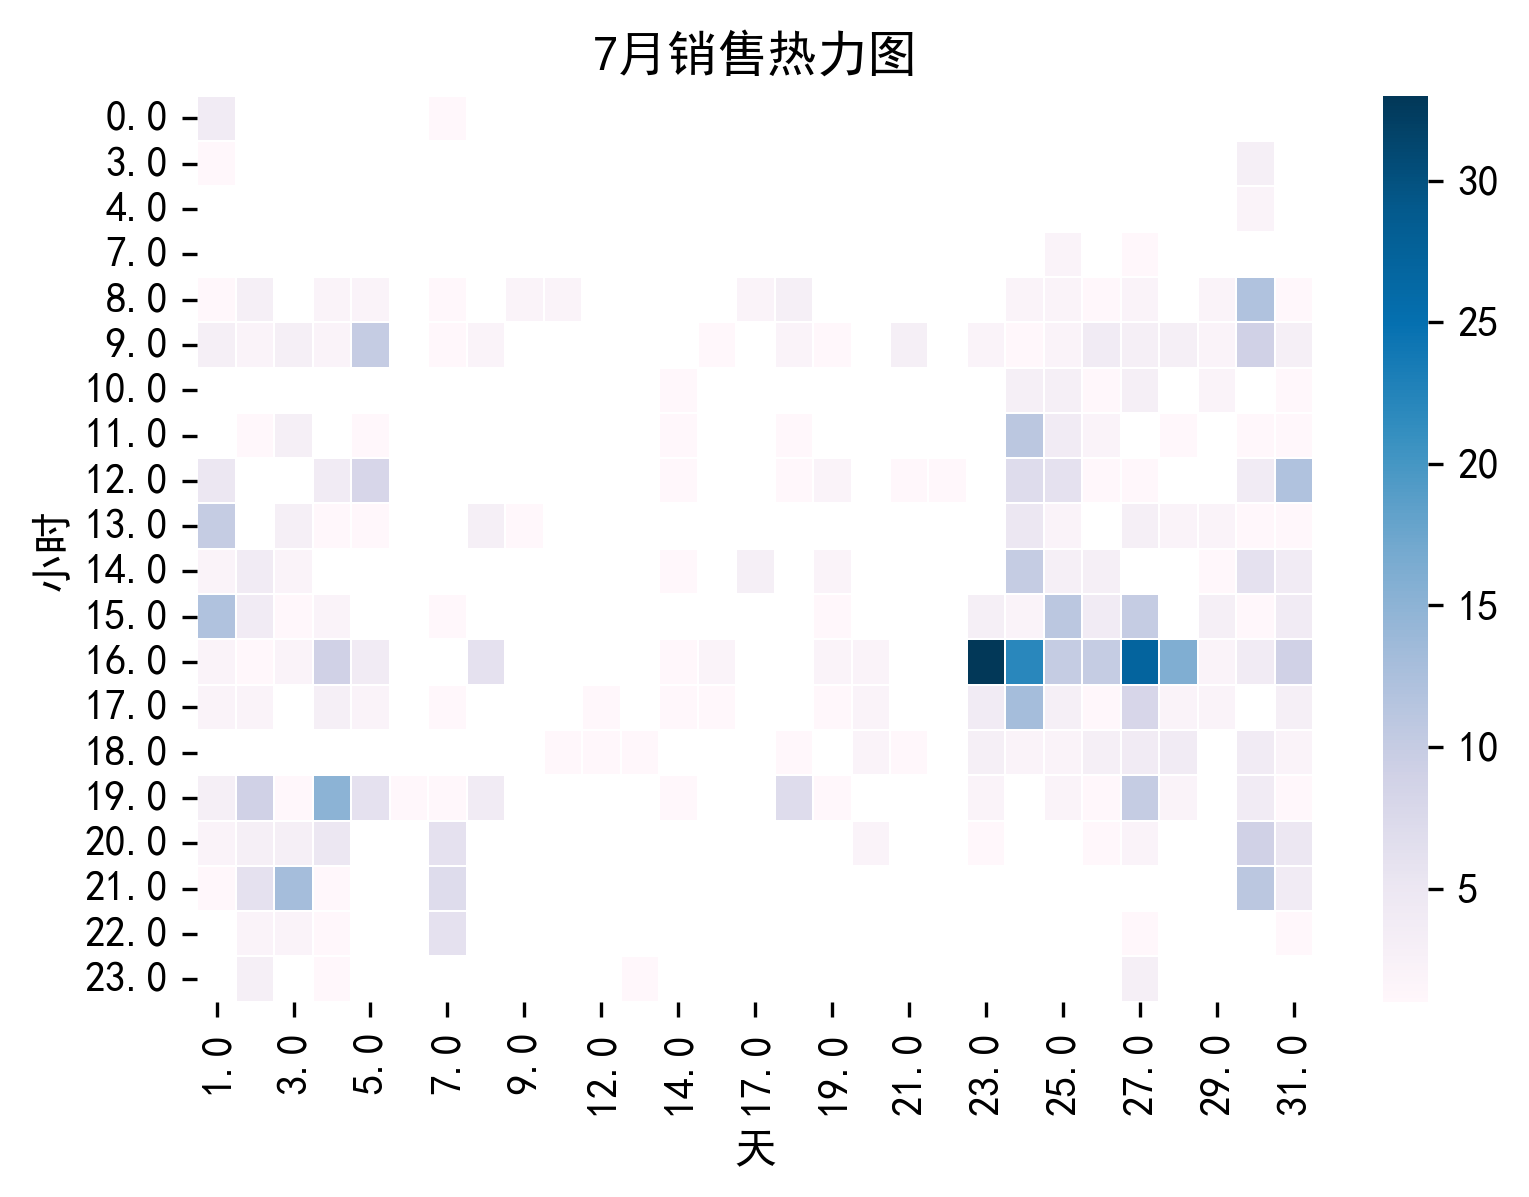

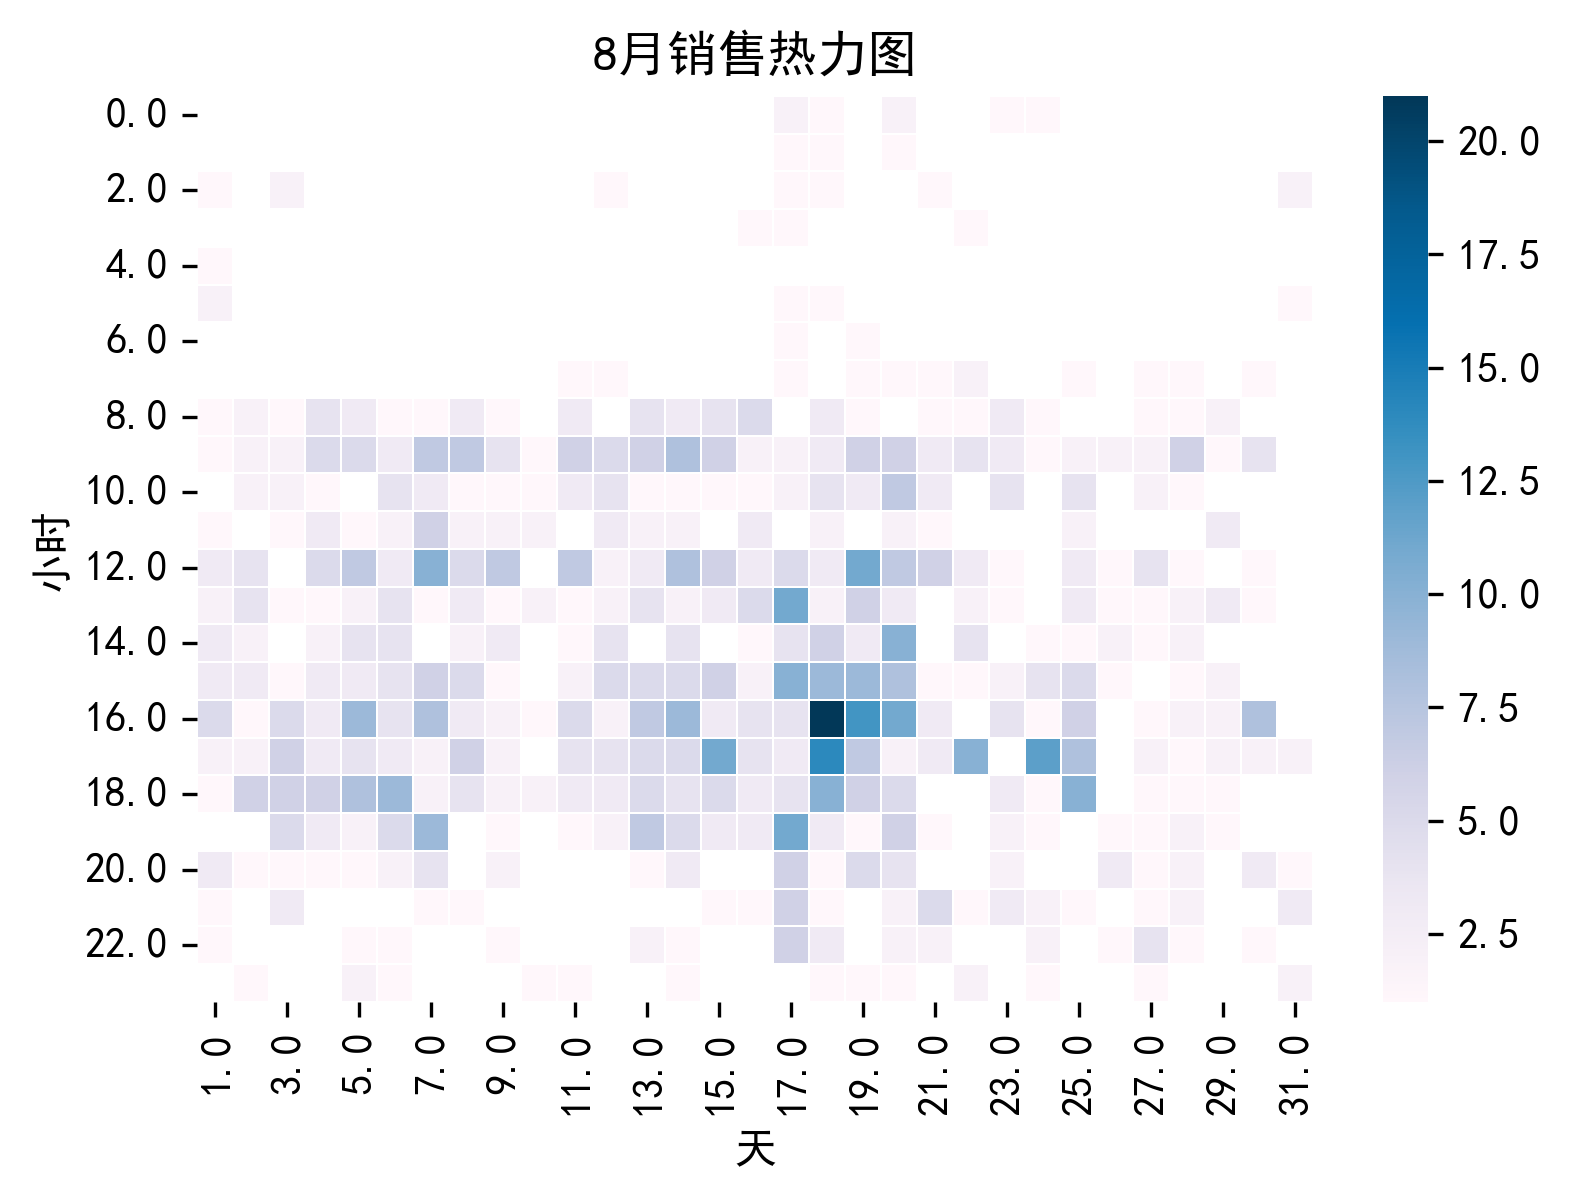

In [30]:
compoC['天'] = compoC['支付时间'].dt.day
compoC['小时'] = compoC['支付时间'].dt.hour
compoC_6 = compoC[compoC['月'] == 6]
compoC_7 = compoC[compoC['月'] == 7]
compoC_8 = compoC[compoC['月'] == 8]
C6 = compoC_6.groupby(by=['天','小时'])
result6=C6.aggregate({'商品':np.size})
C7 = compoC_7.groupby(by=['天','小时'])
result7=C7.aggregate({'商品':np.size})
C8 = compoC_8.groupby(by=['天','小时'])
result8=C8.aggregate({'商品':np.size})
sum6=result6.pivot_table(index='小时',columns='天',values='商品')
sum7=result7.pivot_table(index='小时',columns='天',values='商品')
sum8=result8.pivot_table(index='小时',columns='天',values='商品')
pic66 = plt.figure(dpi=300)
sns.heatmap(data=sum6,cmap='PuBu',linewidths=.1,annot=False,fmt='.1e')
plt.title('6月销售热力图')
pic66.savefig('6月订单量热力图')
pic67 = plt.figure(dpi=300)
sns.heatmap(data=sum7,cmap='PuBu',linewidths=.1,annot=False,fmt='.1e')
plt.title('7月销售热力图')
pic67.savefig('7月订单量热力图')
pic68 = plt.figure(dpi=300)
sns.heatmap(data=sum8,cmap='PuBu',linewidths=.1,annot=False,fmt='.1e')
plt.title('8月销售热力图')
pic68.savefig('8月订单量热力图')


## 任务三、生成各自动售货机画像



### 任务3.1

分析各售货机商品销售数据，总结规律，给出每台售货机饮料类商品的标签，结果保存在csv文件中，文件名分别为"task3-1A.csv"、"task3-1B.csv"、"task3-1C.csv"、"task3-1D.csv"、"task3-1E.csv"

In [17]:
#获取商品、总实际金额、销售量
def task3_1_1(data):
    compo_sum = []
    compo_count = []
    avgp = []
    for i in goods:
        compo_x = data[data['商品'] == i]['实际金额'].sum()
        compo_y = data[data['商品'] == i]['商品'].size
        unitp = compo_x/compo_y
        compo_sum.append(compo_x)
        compo_count.append(compo_y)
        avgp.append(unitp)
    task3_1 = pd.DataFrame({'商品':goods,'总实际金额':compo_sum,'销售量':compo_count,'平均单价':avgp})
    return task3_1

In [18]:
task3_1_1A = task3_1_1(compoA)
task3_1_1B = task3_1_1(compoB)
task3_1_1C = task3_1_1(compoC)
task3_1_1D = task3_1_1(compoD)
task3_1_1E = task3_1_1(compoE)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16584\145773620.py:9: RuntimeWarning: invalid value encountered in double_scalars
  unitp = compo_x/compo_y


In [19]:
#离差标准化
def task3_1_2(data):
    std = []
    for i in range(len(data['销售量'])):
        disp = (data['销售量'][i] - data['销售量'].min())/(data['销售量'].max() - data['销售量'].min())
        std.append(disp)
    data['离差标准化销售量'] = std
    return data

In [20]:
task3_1_2A = task3_1_2(task3_1_1A)
task3_1_2B = task3_1_2(task3_1_1B)
task3_1_2C = task3_1_2(task3_1_1C)
task3_1_2D = task3_1_2(task3_1_1D)
task3_1_2E = task3_1_2(task3_1_1E)

In [21]:
#聚类
def km(data):
    kA = pd.DataFrame(data['离差标准化销售量'])
    kmeans = KMeans(n_clusters=3).fit(kA)
    data['cluster'] = kmeans.labels_
    data['销量标签'] = 0
    for i in range(len(data['cluster'])):
        if(data['cluster'][i] == 2):
            data['销量标签'][i] = '热销'
        elif(data['cluster'][i] == 1):
            data['销量标签'][i] = '正常'
        elif(data['cluster'][i] == 0):
            data['销量标签'][i]='滞销'
    #task3_1 = pd.DataFrame({'商品':data['商品'],'销售量':data['销售量'],'标签':data['标签']})
    return data


In [22]:
task3_1A = km(task3_1_2A)
task3_1B = km(task3_1_2B)
task3_1C = km(task3_1_2C)
task3_1D = km(task3_1_2D)
task3_1E = km(task3_1_2E)
task3_1A.to_csv('task3_1A.csv',encoding='gbk')
task3_1B.to_csv('task3_1B.csv',encoding='gbk')
task3_1C.to_csv('task3_1C.csv',encoding='gbk')
task3_1D.to_csv('task3_1D.csv',encoding='gbk')
task3_1E.to_csv('task3_1E.csv',encoding='gbk')

C:\Users\DELL\AppData\Local\Temp\ipykernel_16584\639455676.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['销量标签'][i]='滞销'
C:\Users\DELL\AppData\Local\Temp\ipykernel_16584\639455676.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['销量标签'][i]='滞销'
C:\Users\DELL\AppData\Local\Temp\ipykernel_16584\639455676.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['销量标签'][i] = '正常'
C:\Users\DELL\AppData\Local\Temp\ipyke

### 任务3.2

在任务 3.1 的基础上进行标签拓展，依据标签生成完整的售货机画像，结果保存在 CSV 文件中，文件名分别为“task3-2A.csv”、task3- 2B.csv”、…、“task3-2E.csv”。依据此画像进行总结描述，给出营销意见

In [33]:
def task3_2(data):
    X = pd.DataFrame(data['平均单价'])
    abd = MinMaxScaler().fit(X)
    X_A = pd.DataFrame(abd.transform(X))
    X_A = X_A.fillna(value=0)
    X_A.isnull()
    kmeans = KMeans(n_clusters = 3,random_state=123).fit(X_A)
    data['cluster2'] = kmeans.labels_
    data['金额标签'] = 0
    for i in range(len(data['cluster'])):
        if(data['cluster2'][i] == 2):
            data['金额标签'][i] = '高价'
        elif(data['cluster2'][i] == 1):
            data['金额标签'][i] = '平价'
        elif(data['cluster2'][i] == 0):
            data['金额标签'][i]='低价'
    data['售货机画像'] = data['金额标签'] + data['销量标签']
    return data

In [39]:
task3_2A = task3_2(task3_1A)
task3_2B = task3_2(task3_1B)
task3_2C = task3_2(task3_1C)
task3_2D = task3_2(task3_1D)
task3_2E = task3_2(task3_1E)
task3_2A = task3_2A.sort_values(by= '销售量',ascending=False)
task3_2B = task3_2B.sort_values(by= '销售量',ascending=False)
task3_2C = task3_2C.sort_values(by= '销售量',ascending=False)
task3_2D = task3_2D.sort_values(by= '销售量',ascending=False)
task3_2E = task3_2E.sort_values(by= '销售量',ascending=False)
task3_2A.to_csv('task3_2A.csv',encoding='gbk')
task3_2B.to_csv('task3_2B.csv',encoding='gbk')
task3_2C.to_csv('task3_2C.csv',encoding='gbk')
task3_2D.to_csv('task3_2D.csv',encoding='gbk')
task3_2E.to_csv('task3_2E.csv',encoding='gbk')


C:\Users\DELL\AppData\Local\Temp\ipykernel_16584\695153760.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['金额标签'][i]='低价'
C:\Users\DELL\AppData\Local\Temp\ipykernel_16584\695153760.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['金额标签'][i]='低价'
C:\Users\DELL\AppData\Local\Temp\ipykernel_16584\695153760.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['金额标签'][i]='低价'
C:\Users\DELL\AppData\Local\Temp\ipykern

## 任务四、业务预测

假设自动售货机的经营者向数据分析师提出依据附件中的1年的数据来预测每台售货机的每个大类商品在2018年1月的交易额的要求。请你们完成如下问题:



### 任务4.1 

预测未来销售额的原理是什么?是否可以根据附件提供的数据对每台售货机的每个大类商品在2018年1月的交易额进行预测，请阐述原因



### 任务4.2

如果你们认为可以进行预测，请给出过程及结果，如果认为附件所给数据不足以支持预测工作应该向经营者提出哪些数据方面的要求?

In [25]:
def task4_2(data):
    money = []
    a = 0
    while a < 12:
        a+=1
        data_t = data[data['月'] == a]
        data_money = data_t['实际金额'].sum()
        money.append(data_money)
    return money
all = (drinksA, notdrinksA, drinksB,notdrinksB,drinksC,notdrinksC,drinksD,notdrinksD,drinksE,notdrinksE)
all2 = ['dA','ndA','dB','ndB','dC','ndC','dD','ndD','dE','ndE']
for i in range(10):
    all2[i] = task4_2(all[i])
alD = [0,0,0,0,0]
alnD = [0,0,0,0,0]
for i in range(5):
    alD[i] = all2[2*i]
    alnD[i] = all2[2*i+1]


In [26]:
def gm11(x,n):
    nn=len(x)
    x1=np.cumsum(x)#第一次累加
    z1=(x1[:len(x1)-1]+x1[1:])*1.0/2.0 #紧邻均值
    yy=x[1:]
    xx=z1
    k = ((nn-1)*np.sum(xx*yy)-np.sum(xx)*np.sum(yy))/((nn-1)*np.sum(xx*xx)-np.sum(xx)*np.sum(xx))
    b = (np.sum(xx*xx)*np.sum(yy)-np.sum(xx)*np.sum(xx*yy))/((nn-1)*np.sum(xx*xx)-np.sum(xx)*np.sum(xx))
    a=-k
    #print(a,b)
    
    if np.abs(a)>2:
        print("没有意义")
    elif np.abs(a)<=2:
        print("有意义")
        if 0.3<-a<=0.5:
            print("适用于短期预测")
        elif 0.5<-a<=0.8:
            print("对于短期数据谨慎使用!")
        elif 0.8<-a<=1.0:
            print("应该对此模型进行修正!")
        elif -a>1.0:
            print("不宜使用GM(1,1)模型预测!")
        else:
            print("适用于中期和长期预测")
            
    x0_hat=np.zeros(nn)
    x0_hat[0]=x[0]
    
    for m in range(nn-1):
        x0_hat[m+1]=(1-np.exp(a))*(x[0]-b/a)*np.exp(-a*m)#预测的x0
    result=np.zeros(n)
    #print("x0_hat:\n",x0_hat)
    
    for i in range(n):
        result[i]=(1-np.exp(a))*(x[0]-b/a)*np.exp(-a*(nn+i))
        
    absolute_residuals = x[1:] - x0_hat[1:]#计算绝对残差和相对残差
    relative_residuals = np.abs(absolute_residuals) / x[1:]
    #print("相对残差:\n",relative_residuals)
    
    class_ratio = []
    eta = []
    for i in range(1,12):
        cr1 = alD[0][i]/alD[0][i-1]#计算级比和级比偏差
        class_ratio.append(cr1)
        eta1 = np.abs(1-(1-0.5*a)/(1+0.5*a)*(1/class_ratio[i-1]))
        eta.append(eta1)
    #print('级比偏差:\n',eta)
    
    return result

In [27]:
Dresult = []
i=0
while i <5:
    i += 1
    ed = gm11(alD[i-1],1)
    Dresult.append(ed)
Dresult = pd.DataFrame({'饮料类':Dresult})
nDresult = []
j=0
while j <5:
    j += 1
    ed1 = gm11(alD[i-1],1)
    nDresult.append(ed1)
nDresult = pd.DataFrame({'非饮料类':nDresult})
name = ['A','B','C','D','E']
name = pd.DataFrame({'售货机':name})
result = pd.concat([name,Dresult,nDresult],axis=1)
result.to_csv('result.csv',encoding='gbk')

有意义
适用于中期和长期预测
有意义
适用于中期和长期预测
有意义
适用于中期和长期预测
有意义
适用于中期和长期预测
有意义
适用于中期和长期预测
有意义
适用于中期和长期预测
有意义
适用于中期和长期预测
有意义
适用于中期和长期预测
有意义
适用于中期和长期预测
有意义
适用于中期和长期预测
